In [38]:
import pandas as pd

# https://www.kaggle.com/code/rajeshjnv/mall-customer-visually-analysis-k-means/data
df = pd.read_csv('mancity.csv')
dfr = pd.read_csv('real.csv')
print(df.head())
dfb =pd.read_csv('barca.csv')
print(dfb.head())
X = pd.concat([df, dfb,dfr], ignore_index=True)
X = X.drop(columns=["Player Name"])
X = X.sort_values(by=['Goals', 'Assists'], ascending=False).reset_index(drop=True)

#X =X[X['Goals']>0]
#X =X[X['Assists']>0]
print(X)


       Player Name  Goals  Assists
0   Erling Haaland     22        3
1  Kevin De Bruyne      4        7
2       Phil Foden      7        2
3      Jeremy Doku      3        6
4          Savinho      1        8
          Player Name  Goals  Assists
0  Robert Lewandowski     42        8
1            Raphinha     18       22
2        Lamine Yamal     16       21
3      FermÃ­n LÃ³pez      7        9
4               Pedri      4       12
     Goals  Assists
0       42        8
1       30       12
2       25       10
3       22        3
4       18       22
..     ...      ...
102      0        0
103      0        0
104      0        0
105      0        0
106      0        0

[107 rows x 2 columns]


In [39]:

from sklearn.cluster import KMeans



from sklearn.metrics import silhouette_score

range_n_clusters = [ 3, 4, 5, 6, 7, 8]
max_silhouette_score=0
best_n_clusters=0
for n_clusters in range_n_clusters:

    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    
    silhouette_avg = silhouette_score(X, model.labels_)
    if silhouette_avg>max_silhouette_score:
        max_silhouette_score=silhouette_avg
        best_n_clusters=n_clusters
    print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    round(silhouette_avg,2),
    )
print("Best n_cluster= ",best_n_clusters, " with silhouette score= ", round(max_silhouette_score,2))

For n_clusters = 3 The average silhouette_score is : 0.66
For n_clusters = 4 The average silhouette_score is : 0.67
For n_clusters = 5 The average silhouette_score is : 0.7
For n_clusters = 6 The average silhouette_score is : 0.69
For n_clusters = 7 The average silhouette_score is : 0.7
For n_clusters = 8 The average silhouette_score is : 0.67
Best n_cluster=  5  with silhouette score=  0.7


In [40]:
n_clusters=best_n_clusters
kmeans = KMeans(n_clusters=n_clusters,random_state=0)

kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

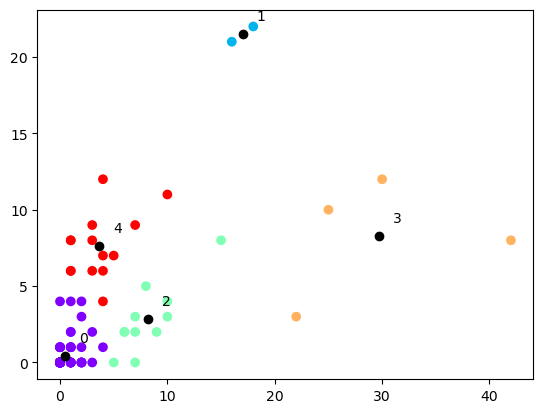

In [41]:
import matplotlib.pyplot as plt

X1 = X["Goals"]

X2 = X["Assists"]

plt.scatter(X1,X2, c=kmeans.labels_,  cmap='rainbow')

XCenters = kmeans.cluster_centers_[:,0]
YCenters = kmeans.cluster_centers_[:,1]

plt.scatter(XCenters ,YCenters, color='black')

for i in range(best_n_clusters):
    plt.annotate(
        i,
        xy=(XCenters[i], YCenters[i]), 
        textcoords='offset points',
        xytext=(10, 10))

plt.show()